In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Total Lyme Disease counts per region over all years

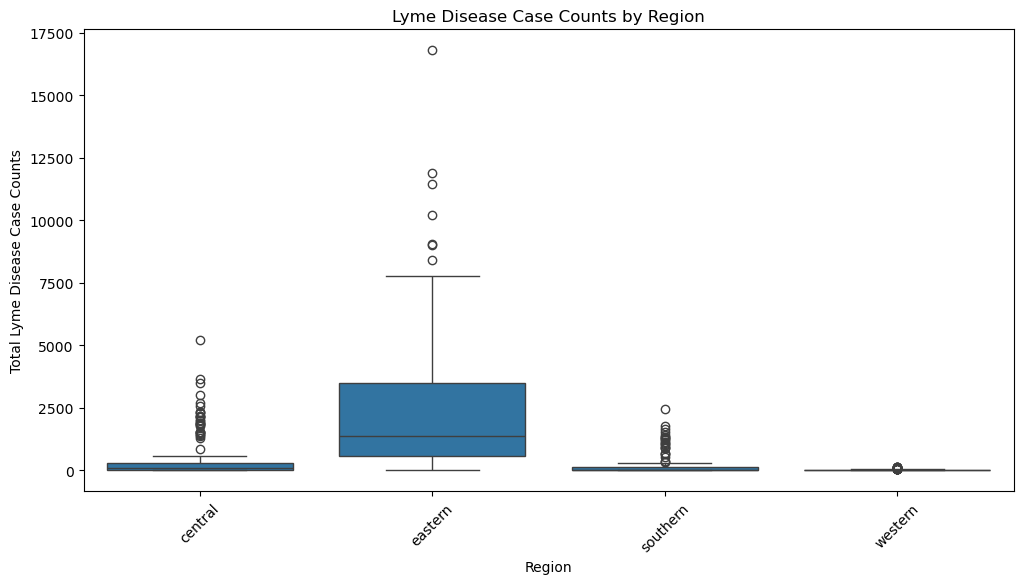

In [2]:
df = pd.read_csv('../data/clean_data/data.csv')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='Lyme_cases')
plt.title('Lyme Disease Case Counts by Region')
plt.xlabel('Region')
plt.ylabel('Total Lyme Disease Case Counts')
plt.xticks(rotation=45)
plt.show()

### Total Lyme disease per region in the year 2022

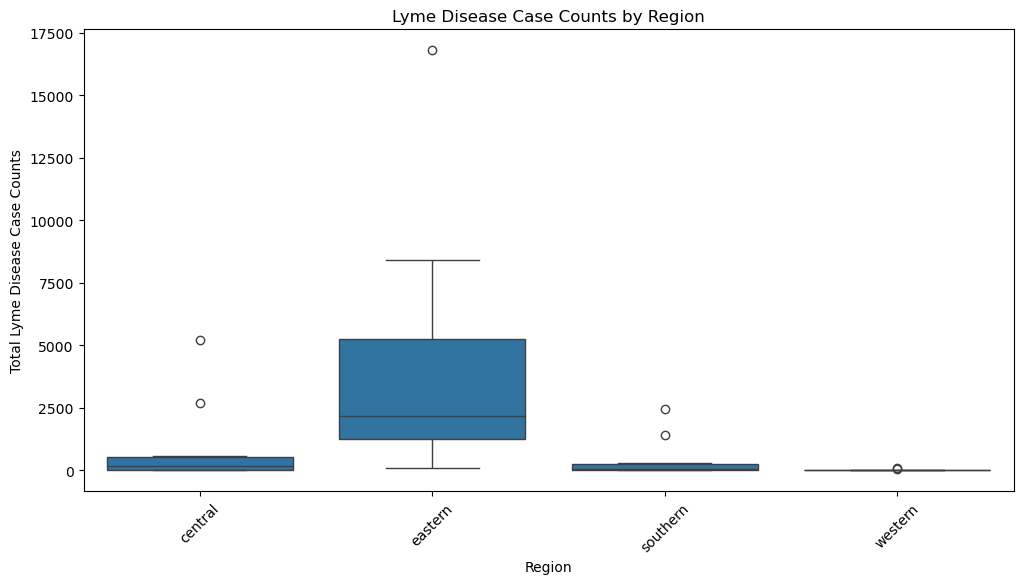

In [3]:
df = pd.read_csv('../data/clean_data/data.csv')

df2022 = df[df["Year"] == 2022]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df2022, x='region', y='Lyme_cases')
plt.title('Lyme Disease Case Counts by Region')
plt.xlabel('Region')
plt.ylabel('Total Lyme Disease Case Counts')
plt.xticks(rotation=45)
plt.show()

In [4]:
topstate = df2022.loc[df2022["Lyme_cases"].idxmax(), "State"]
topcases = df2022.loc[df2022["Lyme_cases"].idxmax(), "Lyme_cases"]

print(f"The highest count of reported Lyme disease cases in the entire dataset is {topcases}, which occurred in {topstate} in 2022")

The highest count of reported Lyme disease cases in the entire dataset is 16798, which occurred in New York in 2022


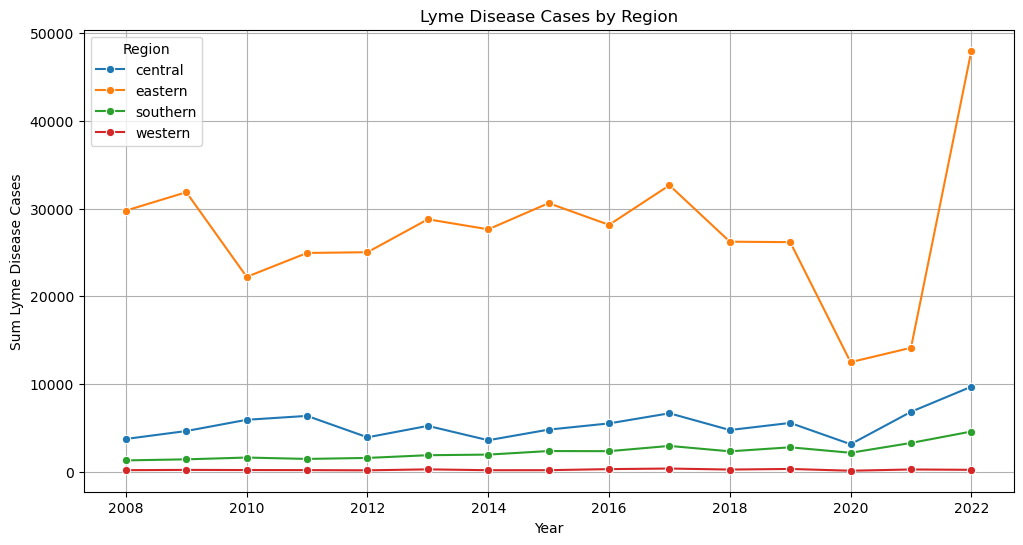

In [5]:
region_sum = df.groupby(['Year', 'region', 'Min_temp_avg', 'Avg_temp', 'Precipitation_avg'])['Lyme_cases'].sum().reset_index()

# line plot: 
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sum, x='Year', y='Lyme_cases', hue='region', marker='o')
xticks = range(int(region_sum['Year'].min()), int(region_sum['Year'].max()) + 1, 2)
plt.xticks(ticks=xticks)
plt.title('Lyme Disease Cases by Region')
plt.xlabel('Year')
plt.ylabel('Sum Lyme Disease Cases')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [6]:
print(df.dtypes)

Year                          int64
Precipitation_avg           float64
region                       object
Min_temp_avg                float64
Avg_temp                    float64
State                        object
Lyme_cases                    int64
Total_Land_Area               int64
Tree_Cover_Loss               int64
species_richness            float64
state_park_land_coverage    float64
state_park_rank             float64
dtype: object


   Year   region  Min_temp_avg  Avg_temp  Precipitation_avg  Total_Land_Area  \
0  2008  central          53.8      66.1               4.49          9436269   
1  2008  central          53.8      66.1               4.49         11993914   
2  2008  central          53.8      66.1               4.49         14584483   
3  2008  central          53.8      66.1               4.49         15008781   
4  2008  central          53.8      66.1               4.49         16929671   

   Tree_Cover_Loss  species_richness  state_park_land_coverage  \
0             1051               8.0                    0.0081   
1             8298               4.0                    0.0077   
2              209               5.0                    0.0021   
3              615               6.0                    0.0139   
4            18604               6.0                    0.0195   

   state_park_rank  Lyme_cases  
0             32.0          42  
1             34.0          45  
2             42.0     

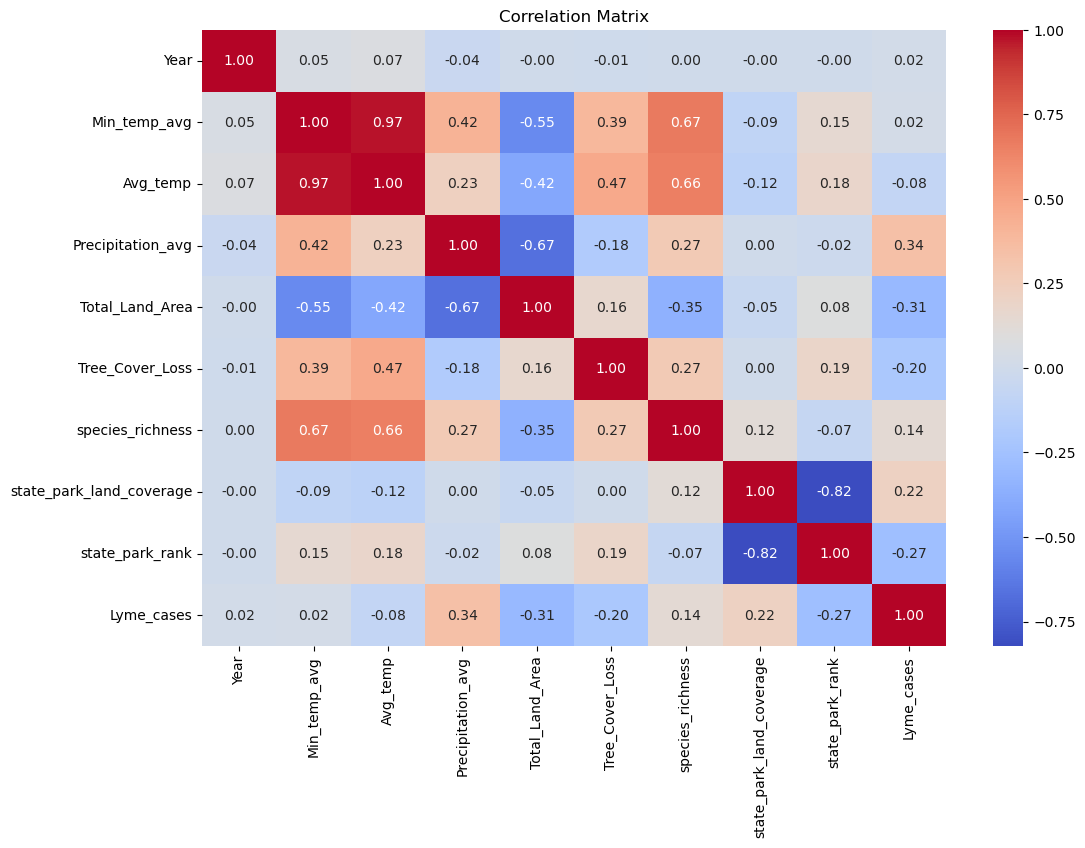

In [7]:
# dataset where all indicators are aggregated to region
region_sum = df.groupby(['Year', 'region', 'Min_temp_avg', 'Avg_temp', 'Precipitation_avg', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness', 'state_park_land_coverage', 'state_park_rank'])['Lyme_cases'].sum().reset_index()
print(region_sum.head())

numeric_df = region_sum.drop('region', axis=1)

# correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# visualize correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

Precipitation over years per region: 

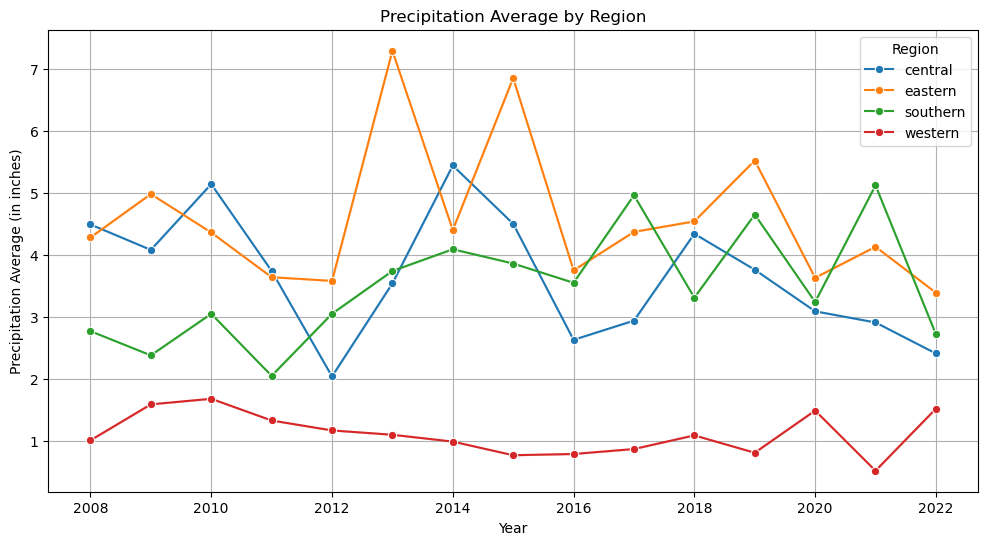

In [10]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Precipitation_avg', hue='region', marker='o')
xticks = range(int(df['Year'].min()), int(df['Year'].max()) + 1, 2)
plt.xticks(ticks=xticks)
plt.title('Precipitation Average by Region')
plt.xlabel('Year')
plt.ylabel('Precipitation Average (in inches)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Average temperature change: 

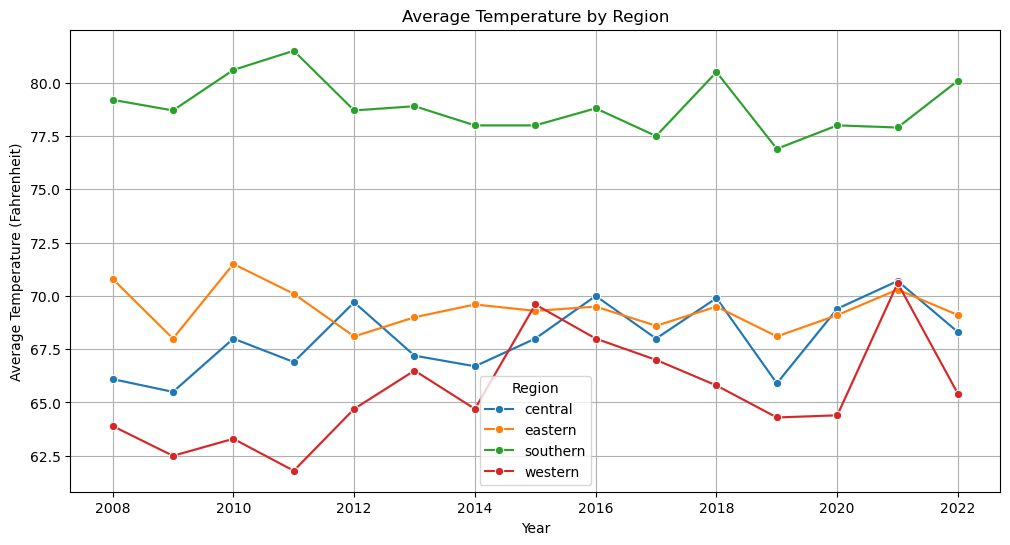

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Avg_temp', hue='region', marker='o')
xticks = range(int(df['Year'].min()), int(df['Year'].max()) + 1, 2)
plt.xticks(ticks=xticks)
plt.title('Average Temperature by Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.legend(title='Region')
plt.grid(True)
plt.show()